# <center>CAP Curricula</center>



In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [47]:
using CurricularAnalytics, CurricularVisualization
using Glob
using Gadfly
using Statistics

## Read Curriculua into Data Structures


In [2]:
# create the dictionary of curricula scoped to each university
# String of "university_name" to Array[Curriculum]
curricula = Dict{String, Array{Curriculum, 1}}()
# list of universities from programs subfolders
universities = glob("*", "./programs")
# regular expression used to match the university name
regular_expression = r"[^\/]*$"
for uni in universities
    # university name used as key in the curricula dictionary
    university_name = match(regular_expression, uni).match
    # iterate through each CSV file for the current university
    for program in glob("*", "$(uni)")
        try
            program_name = replace(split("$(program)", "/")[end], ".csv" => "") # get program name
            curriculum = read_csv(program) # read the CSV file
            if !haskey(curricula, university_name)
                curricula[university_name] = []
            end
            push!(curricula[university_name], curriculum)
            complexity(curriculum)  # compute the curricular complexity of the curriculum
        catch e
            println("Error reading $(program)")
            println(e)
        end
    end
end

Error reading ./programs/Florida State University/BA Commercial Music_temp.csv
SystemError("opening file \"./programs/Florida State University/BA Commercial Music_temp.csv\"", 2, nothing)
Error reading ./programs/Florida State University/BS Biological Science_temp.csv
SystemError("opening file \"./programs/Florida State University/BS Biological Science_temp.csv\"", 2, nothing)
Error reading ./programs/George Mason University/BAS Applied Science, Concentration in Managerial Leadership_temp.csv
SystemError("opening file \"./programs/George Mason University/BAS Applied Science, Concentration in Managerial Leadership_temp.csv\"", 2, nothing)
Error reading ./programs/New Mexico State University-Main Campus/BS Agricultural Biology (Applied Biology).csv
CSV.Error("thread = 1 fatal error, encountered an invalidly quoted field while parsing around row = 48, col = 2: \"\"Electiv\", error=INVALID: OK | QUOTED | EOF | INVALID_QUOTED_FIELD , check your `quotechar` arguments or manually fix the fiel

In [4]:
print(length(curricula))

29

["Clark Atlanta University", "Florida International University", "Florida State University", "George Mason University", "Georgia State University", "Kent State University", "Morgan State University", "New Mexico State University-Main Campus", "Rutgers University - Newark", "Temple University", "The University of Texas Rio Grande Valley", "The University of Texas at Arlington", "The University of Texas at Dallas", "The University of Texas at El Paso", "The University of Texas at San Antonio", "The University of Texas at Tyler", "UC Davis", "UC Irvine", "UNC Charlotte - Revised", "University of Arizona", "University of Central Florida", "University of Illinois Chicago", "University of Memphis", "University of New Mexico-Main Campus", "University of South Florida", "University of Toledo", "Utah State University", "Washington State University"]
[13, 87, 201, 143, 47, 190, 6, 159, 38, 28, 62, 108, 88, 205, 111, 48, 220, 84, 106, 266, 11, 83, 100, 113, 190, 117, 197, 164]


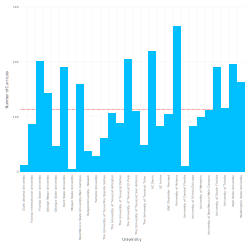

In [62]:
# create x values with alphabetically sorted keys of curricula
x = sort(collect(keys(curricula)))
# remove uc san diego from the list of universities
deleteat!(x, findall(x -> x == "UC San Diego", x))

println(x)
# create y values with the number of curricula at each university
y = [length(curricula[uni]) for uni in x]
println(y)

avg = mean(y)

set_default_plot_size(25cm, 25cm)
# plot the number of curricula at each university
plot(x=x, y=y, Geom.bar, Scale.y_continuous(minvalue=0), Guide.xlabel("University"), Guide.ylabel("Number of Curricula"), intercept=[avg], slope=[0], Geom.abline(color="red", style=:dash))

In [78]:
cleaned_curricula = deepcopy(curricula)
count = 0
for (university, curricula) in cleaned_curricula
    for (i, curriculum) in enumerate(curricula)
        if curriculum.credit_hours < 120
            println("Curriculum $(curriculum.name) at $(curriculum.institution) has less than 120 credit hours")
            deleteat!(cleaned_curricula[university], i)
            count += 1
        end 
    end
end
println("There are $(count) curricula with less than 120 credit hours")

count = 0
for (university, curricula) in cleaned_curricula
    for (i, curriculum) in enumerate(curricula)
        errors = IOBuffer()
        if !isvalid_curriculum(curriculum, errors)
            println("Curriculum $(curriculum.name) at $(curriculum.institution) is not a valid curriculum...")
            print(String(take!(errors)))
            deleteat!(cleaned_curricula[university], i)
            count += 1
        end 
    end
end

println("There are $(count) invalid curricula.")

Curriculum BA Film and Digital Arts (FLPR) at The University of New Mexico has less than 120 credit hours
Curriculum BA Music at The University of New Mexico has less than 120 credit hours
Curriculum BAA Architecture (PPRO) at The University of New Mexico has less than 120 credit hours
Curriculum BAED Secondary Education (GRMN) at The University of New Mexico has less than 120 credit hours
Curriculum  BS Biochemistry  at The University of New Mexico has less than 120 credit hours
Curriculum BS Nutrition and Dietetics  at The University of New Mexico has less than 120 credit hours
Curriculum BS Radiologic Sciences at The University of New Mexico has less than 120 credit hours
Curriculum Electrical Engineering at  has less than 120 credit hours
Curriculum ME Starting with Foundational Math at  has less than 120 credit hours
Curriculum Aerospace Engineering at University of Central Florida has less than 120 credit hours
Curriculum Computer Engineering at University of Central Florida has 

["Clark Atlanta University", "Florida International University", "Florida State University", "George Mason University", "Georgia State University", "Kent State University", "Morgan State University", "New Mexico State University-Main Campus", "Rutgers University - Newark", "Temple University", "The University of Texas Rio Grande Valley", "The University of Texas at Arlington", "The University of Texas at Dallas", "The University of Texas at El Paso", "The University of Texas at San Antonio", "The University of Texas at Tyler", "UC Davis", "UC Irvine", "UNC Charlotte - Revised", "University of Arizona", "University of Central Florida", "University of Illinois Chicago", "University of Memphis", "University of New Mexico-Main Campus", "University of South Florida", "University of Toledo", "Utah State University", "Washington State University"]
[12, 73, 195, 142, 45, 172, 6, 155, 35, 27, 62, 83, 87, 204, 109, 48, 132, 84, 106, 256, 5, 81, 90, 104, 171, 116, 164, 162]


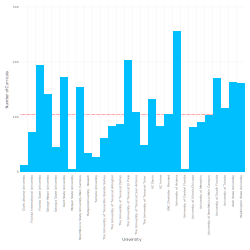

In [79]:
# create x values with alphabetically sorted keys of curricula
x = sort(collect(keys(cleaned_curricula)))
# remove uc san diego from the list of universities
deleteat!(x, findall(x -> x == "UC San Diego", x))

println(x)
# create y values with the number of curricula at each university
y = [length(cleaned_curricula[uni]) for uni in x]
println(y)

avg = mean(y)

set_default_plot_size(25cm, 25cm)
# plot the number of curricula at each university
plot(x=x, y=y, Geom.bar, Scale.y_continuous(minvalue=0), Guide.xlabel("University"), Guide.ylabel("Number of Curricula"), intercept=[avg], slope=[0], Geom.abline(color="red", style=:dash))

Next steps for cleaning and visualizing the data:
- Cleaning up duplicate programs (Can we use OpenAI or some other NLP to do this?)
- Cleaning up CSV files (quarter / semester fix, corrupted files)
- Box and whisker of many disciplines by CIP code (first two digits)
- What is the distribution of complexities by school? How do the distributions of different schools compare?
- Average number of programs at an institution
- Most central course by CIP at each school. Is it basically the same course at every school?
    - In EE it's almost always circuits. In CS it's almost always data structures. In math it's almost always linear algebra.

In [ ]:
# plot the complexity_values
Gadfly.plot(x=complexity_values, Geom.histogram(), Guide.xlabel("Curricular Complexity"), Guide.ylabel("Frequency"))

In [1]:
# print all curricula that contain 0 requisites
for curriculum in cleaned_curricula
    if curriculum.metrics["complexity"][2] == 0
        println("$(curriculum.name) at $(curriculum.institution) has 0 requisites")
    end
end

LoadError: UndefVarError: cleaned_curricula not defined